In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
diab=pd.read_csv("diabetic_data.csv")
diabet = diab.replace("?",np.nan)
diabet.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Data Set Description


* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission











## Before I start, I realized that there are "?" sign that represented the NAN values. Getting rid of some information missing, I will replace them with np.nan

In [8]:
diabet = diabet.replace("?",np.nan)

In [9]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# **Exploratory Data Analysis and Visualizations**

### **Readmitted**
This column our target feature. It is about **"days to inpatient readmission"**
* If the patient was readmitted in less than 30 days **"<30"**
* if the patient was readmitted in more than 30 days **">30"**
* If there is no record **"NO"**

We decided to reduce these values to two and map them according to the following rule;
* NO and >30-> 0
* <30 -> 1

C:\Users\Harsha S\AppData\Local\Temp\ipykernel_43832\1595005390.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabet = diabet.replace({"NO":0,


readmitted
0    90409
1    11357
Name: count, dtype: int64


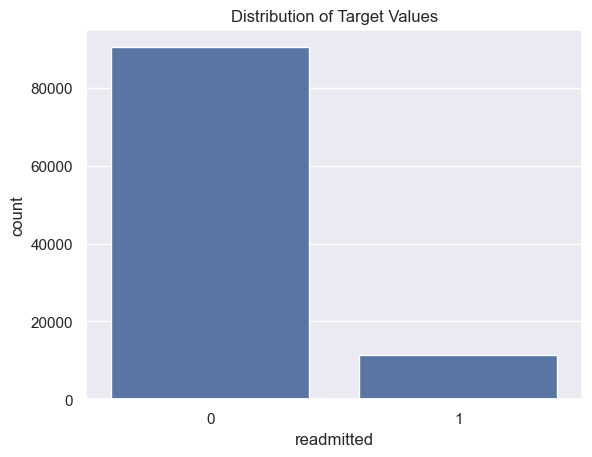

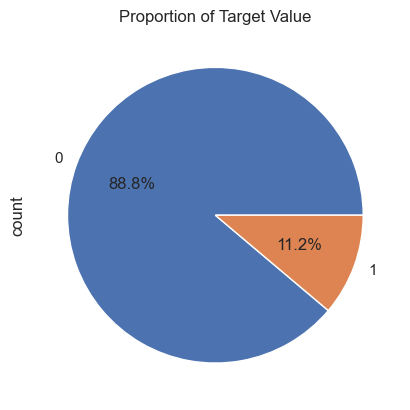

In [13]:
diabet = diabet.replace({"NO":0,
                         "<30":1,
                         ">30":0})

print(diabet.readmitted.value_counts())

sns.countplot(x = "readmitted", data = diabet)
plt.title("Distribution of Target Values")
plt.show()

# Pie chart
diabet.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

- These two diagrams show us that our target variable is almost balanced distributed.

### **Race**
We have 5 different races value, these are;
- Caucasian          
- AfricanAmerican    
- Hispanic            
- Asian
- Other 

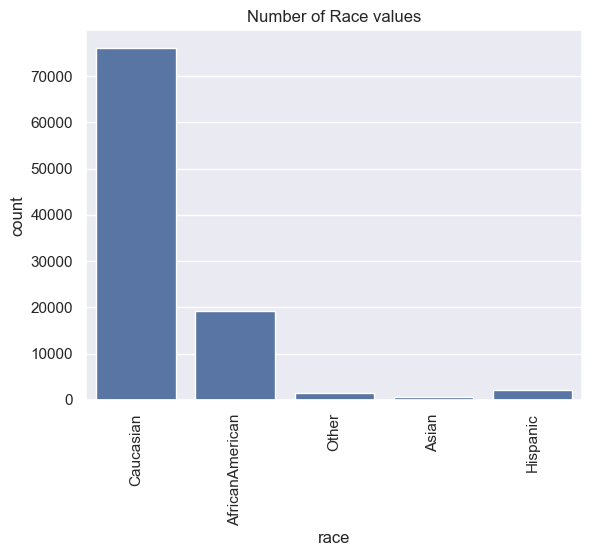

Proportion of Race
race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: proportion, dtype: float64


In [16]:
sns.countplot(x=diabet.race, data = diabet)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(diabet.race.value_counts(normalize = True)*100)

- As we see, there is **Caucasians** in 76 percent of all our data. 
And other other 24 percent is divided into **African Americans**, **Hispanics**, **Asians** and **Others**.<br>
- Here we decided to divide into 3 groups like **Caucasian**, **African American** and **Other**.

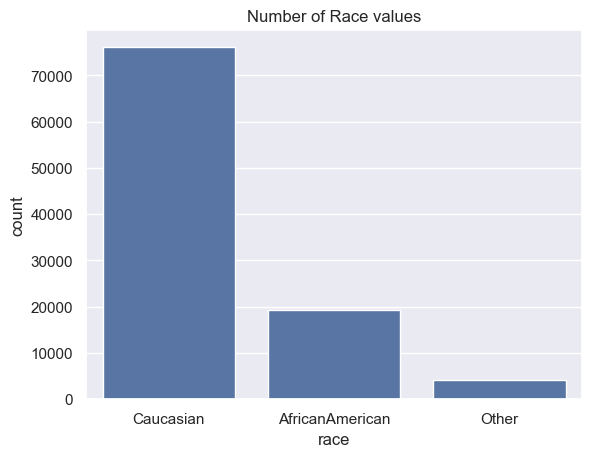

Proportion of Race After the Mapping
race
Caucasian          76.486788
AfricanAmerican    19.307891
Other               4.205321
Name: proportion, dtype: float64


In [18]:
mapped_race = {"Asian":"Other","Hispanic":"Other"}
diabet.race = diabet.race.replace(mapped_race)

sns.countplot(x="race", data = diabet)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race After the Mapping")
print(diabet.race.value_counts(normalize= True)*100)

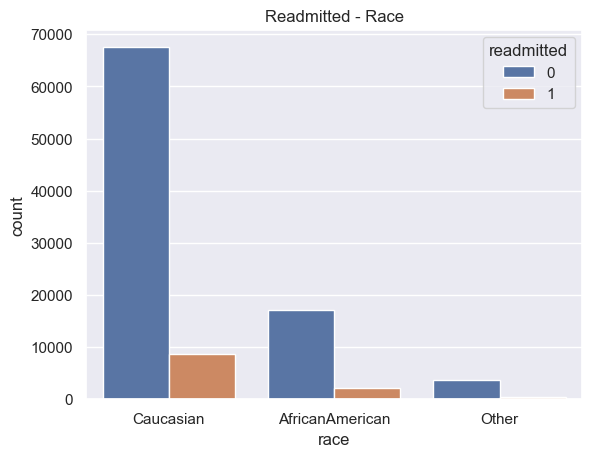

In [19]:
sns.countplot(x="race", hue= "readmitted", data = diabet)
plt.title("Readmitted - Race")
plt.show()

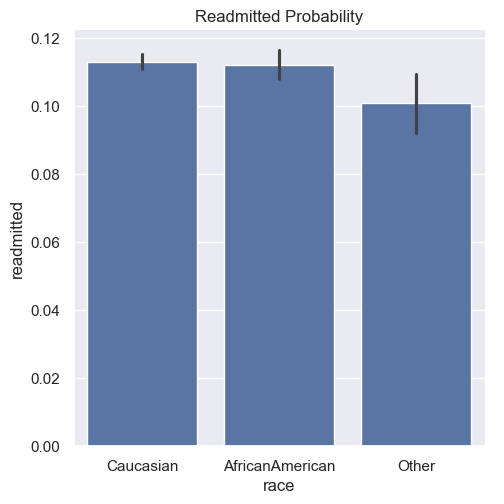

In [20]:
sns.catplot(x = "race", y = "readmitted",
            data = diabet, kind = "bar", height= 5)
plt.title("Readmitted Probability")
plt.show()

- Most of the patients are **Caucasian**, followed by **African Americans**.
- Although the **Other** values are few than **Caucasian**, 
we see that the **Readmitted Probability** almost close to **Caucasian**.

- Most of the patients are **Caucasian**, followed by **African Americans**.
- Although the **Other** values are few than **Caucasian**, 
we see that the **Readmitted Probability** almost close to **Caucasian**.

### **Gender**

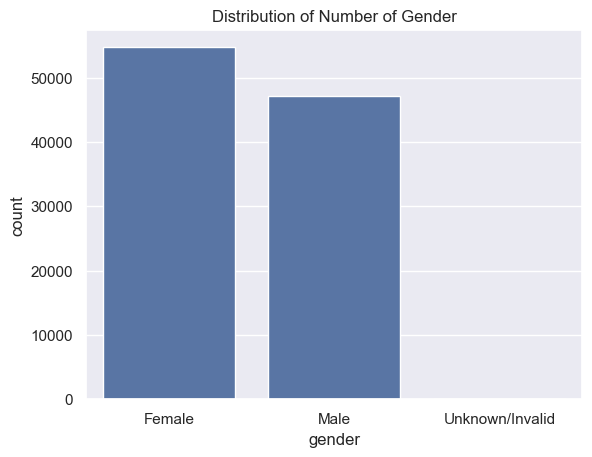

Proportions of Race Value
gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64


In [24]:
sns.countplot(x = "gender", data = diabet)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(diabet.gender.value_counts(normalize = True))

- When we looked up **Gender** values, there is only one entry for **Unknown/Invalid**. So we dropped them

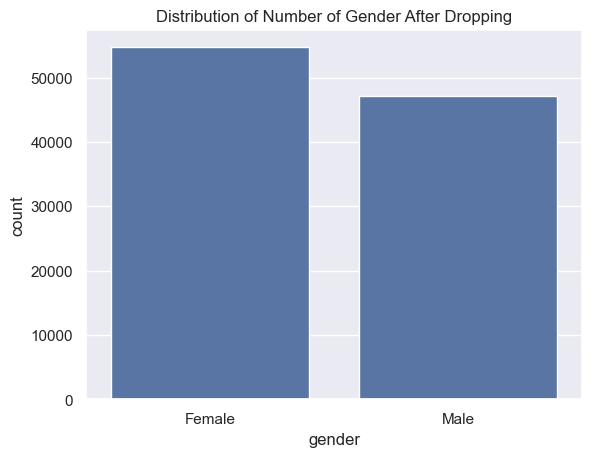

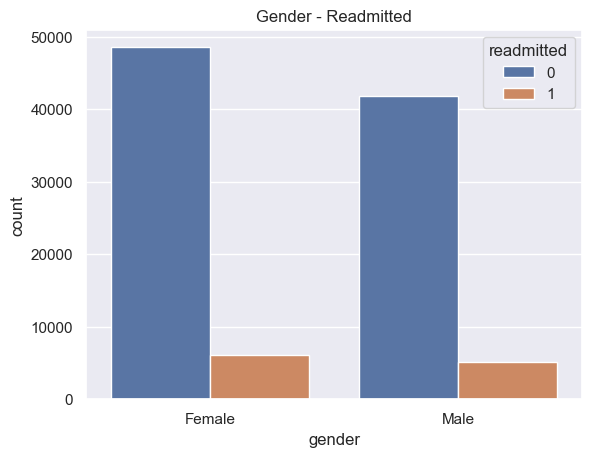

In [26]:
diabet = diabet.drop(diabet.loc[diabet["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = diabet)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = diabet)
plt.title("Gender - Readmitted")
plt.show()

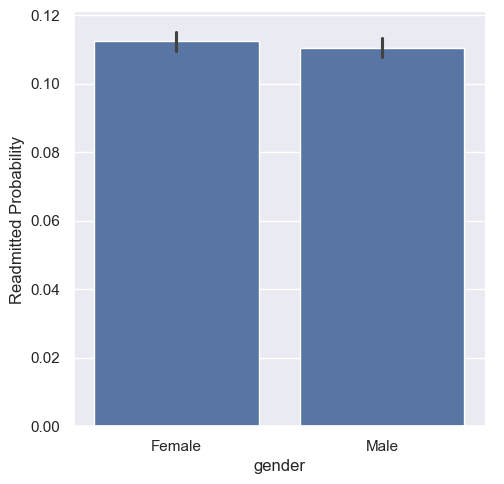

In [27]:
g = sns.catplot(x = "gender",y = "readmitted", 
                data = diabet, kind = "bar", height= 5)
g.set_ylabels("Readmitted Probability")
plt.show()

- We see a nearly equal distribution of **Gender**.
- Also, we can state that **Females** are a little more prone than **Males**.

## **Age**

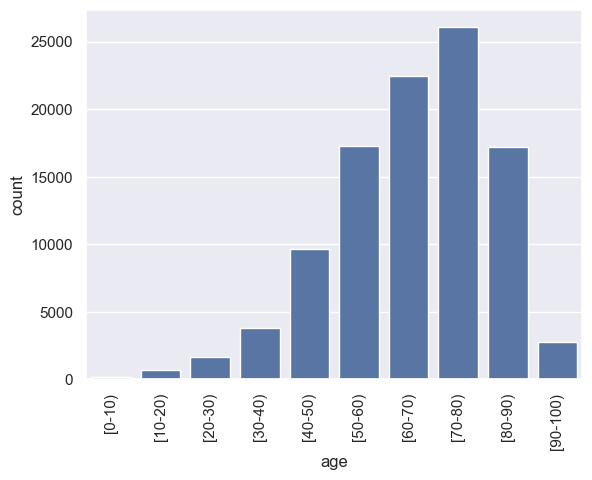

In [30]:
sns.countplot(x="age", data = diabet)
plt.xticks(rotation = 90)
plt.show()

* To get rid of this parenthesis notation and make the **Age** variable a numeric value, we changed it according to the following rule.

C:\Users\Harsha S\AppData\Local\Temp\ipykernel_43832\1692502812.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabet.age = diabet.age.replace({"[70-80)":75,


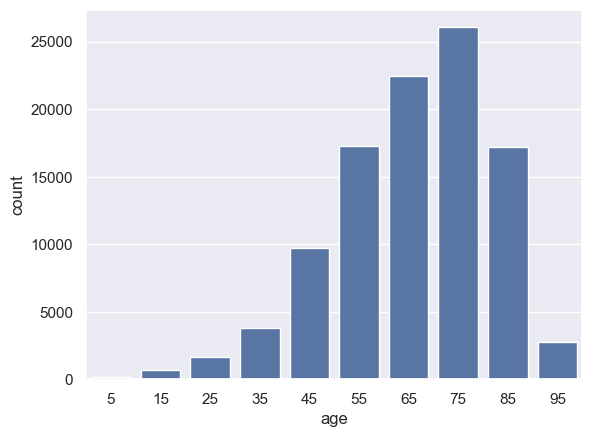

In [32]:
diabet.age = diabet.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = diabet)
#plt.xticks(rotation = 90)
plt.show()

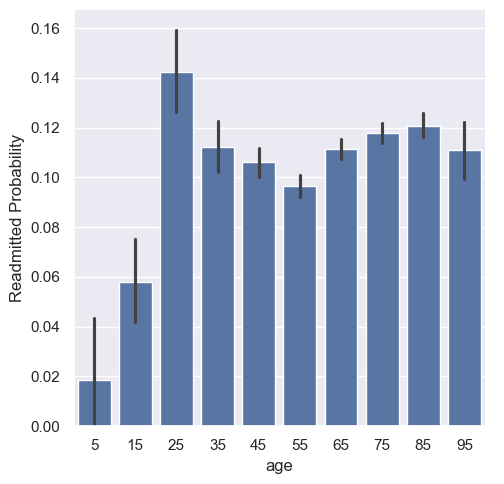

In [33]:
g = sns.catplot(x = "age", y = "readmitted", data = diabet, 
                   kind = "bar", height = 5)
g.set_ylabels("Readmitted Probability")
plt.show()

- we can understand that we have an **elderly population.**

### **Weight**

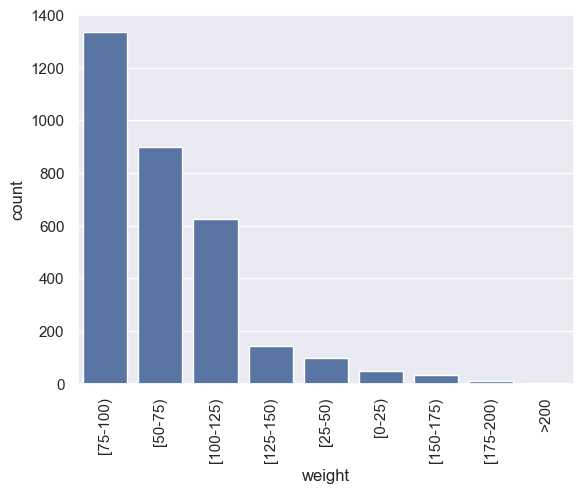

In [36]:
sns.countplot(x = "weight", data = diabet,
            order = diabet.weight.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

- As with the **age** variable, we see the same situation for **weight** and decided to managed like below.

C:\Users\Harsha S\AppData\Local\Temp\ipykernel_43832\2920382224.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabet["weight"]=diabet["weight"].replace({"[75-100)":85,


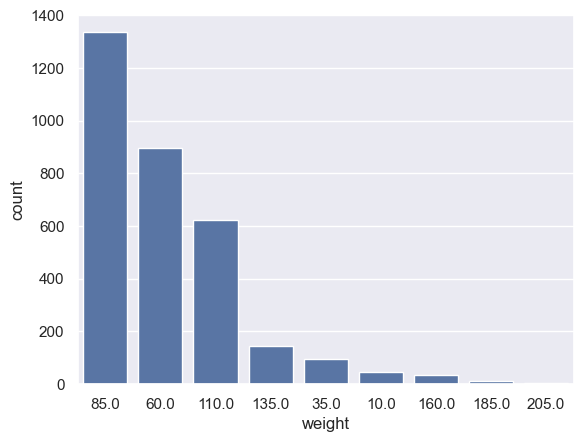

Proportions of Weights
weight
85.0     41.789177
60.0     28.057554
110.0    19.549578
135.0     4.535502
35.0      3.034094
10.0      1.501408
160.0     1.094776
185.0     0.344073
205.0     0.093838
Name: proportion, dtype: float64


In [38]:
diabet["weight"]=diabet["weight"].replace({"[75-100)":85,
                             "[50-75)":60,
                             "[100-125)":110,
                             "[125-150)":135,
                             "[25-50)":35,
                             "[0-25)":10,
                             "[150-175)":160,
                             "[175-200)":185,
                             ">200":205})

sns.countplot(x = "weight", data = diabet,
            order = diabet.weight.value_counts().index)
plt.show()

print("Proportions of Weights")
print(diabet.weight.value_counts(normalize=True)*100)

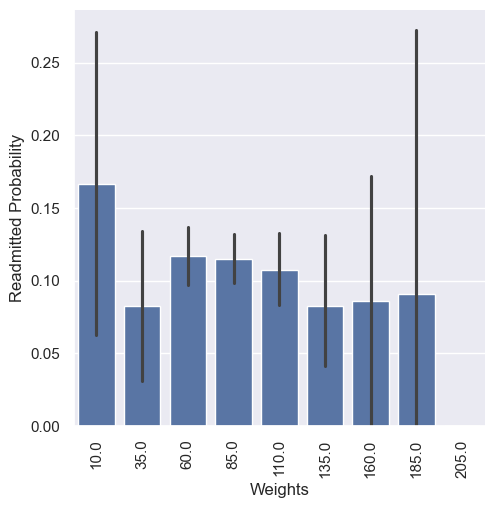

In [39]:
g = sns.catplot(x = "weight", y = "readmitted",
                kind = "bar", data = diabet, height = 5)
g.set_xticklabels(rotation = 90)
g.set_ylabels("Readmitted Probability")
g.set_xlabels("Weights")
plt.show()

### **Admission Type ID**
Integer identifier corresponding to 9 distinct values;
- **Emergency**        : 1
- **Urgent**           : 2
- **Elective**         : 3
- **Newborn**          : 4
- **Not Available**    : 5
- **NULL**             : 6
- **Trauma Center**    : 7
- **Not Mapped**       : 8



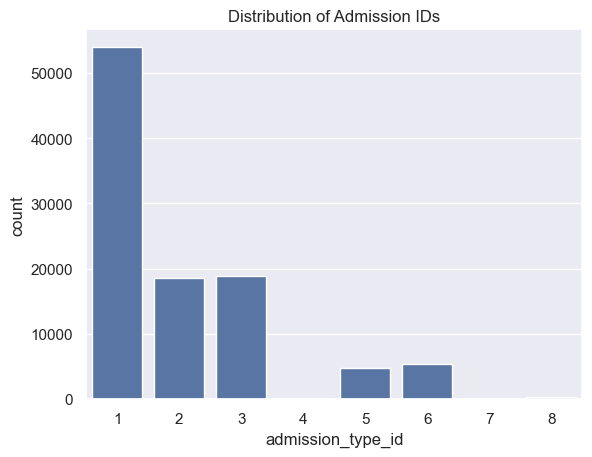

Distribution of ID's
admission_type_id
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64


In [41]:
sns.countplot(x = "admission_type_id", data = diabet)
plt.title("Distribution of Admission IDs")
plt.show()

print("Distribution of ID's")
print(diabet.admission_type_id.value_counts())

In here we need to do mapping for :
- **NULL**, **Not Available** and **Not Mapped** values.
- In addition, we will map **Urgent** value as **Emergency** because they have same meaning

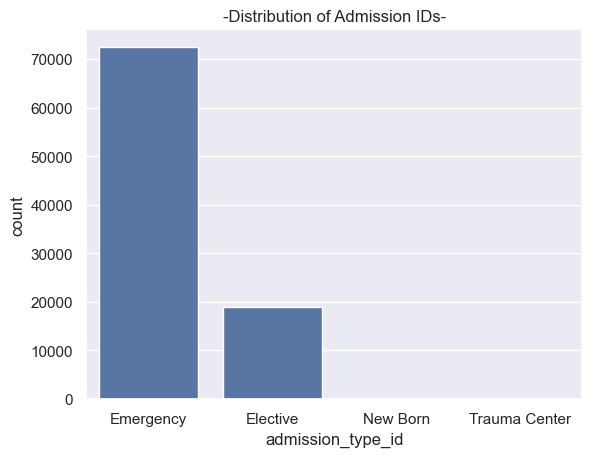

-Distribution of ID's-
admission_type_id
Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: count, dtype: int64


In [43]:
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

diabet.admission_type_id = diabet.admission_type_id.replace(mapped)

sns.countplot(x = "admission_type_id", data = diabet)
plt.title("-Distribution of Admission IDs-")
plt.show()

print("-Distribution of ID's-")
print(diabet.admission_type_id.value_counts())

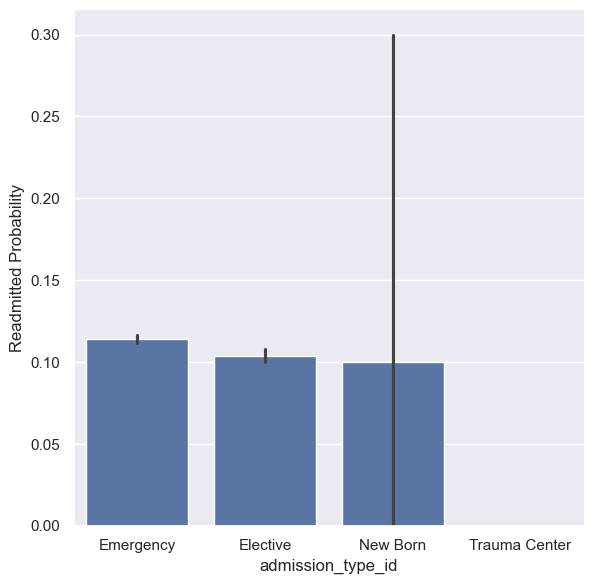

In [44]:
g = sns.catplot(x = "admission_type_id", y ="readmitted", 
                    data = diabet, height = 6, kind = "bar")
g.set_ylabels("Readmitted Probability")
plt.show()

### **Discharge Disposition ID**
-Integer identifier corresponding to 29 distinct values. For example, discharged to home, expired, and not available

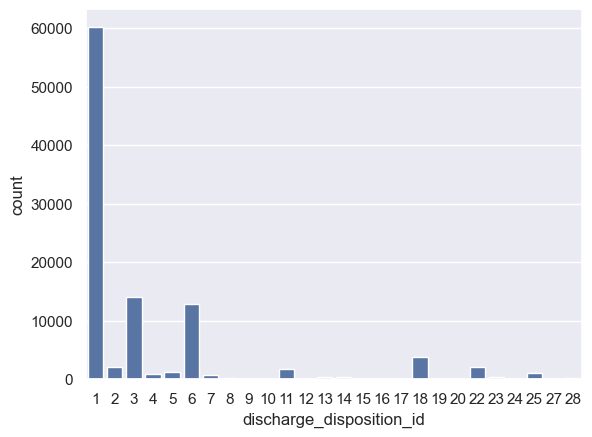

In [46]:
sns.countplot(x ="discharge_disposition_id", data = diabet)
plt.show()

When we look the graph, we can see too much values. Getting rid of that situation,
 we applied this rules: 
- If any one includes **"home"** word I will grouping into one
- If not, it will be as **OTHER**
- NAN = 18, 25, 26

In [48]:
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

diabet["discharge_disposition_id"] = diabet["discharge_disposition_id"].replace(mapped_discharge)

- Now it will be more clear and readable

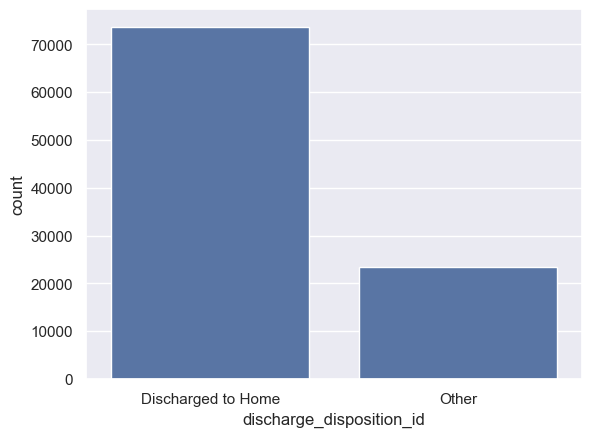

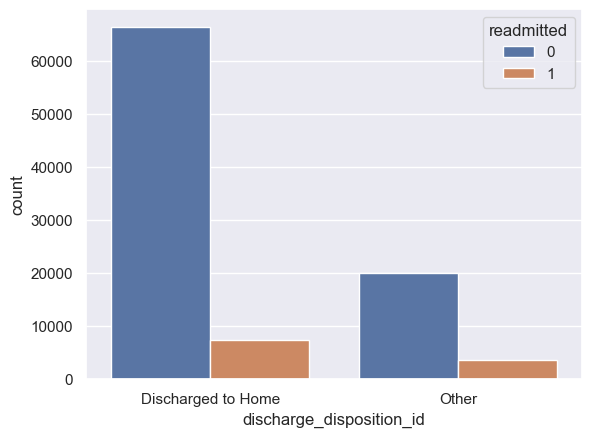

Proportions of ID's
discharge_disposition_id
Discharged to Home    73649
Other                 23434
Name: count, dtype: int64


In [50]:
sns.countplot(x ="discharge_disposition_id", data = diabet)
plt.show()

sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = diabet)
plt.show()

print("Proportions of ID's")
print(diabet.discharge_disposition_id.value_counts())

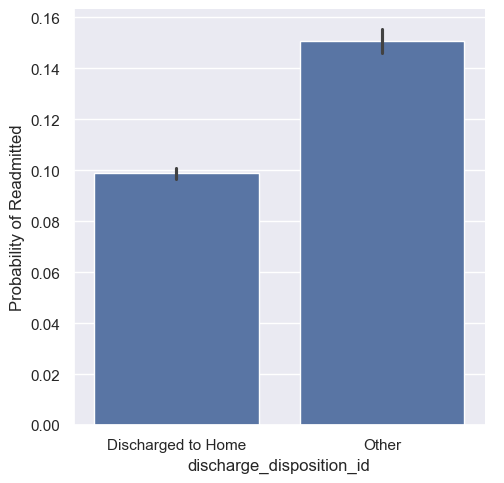

In [51]:
g = sns.catplot(x = "discharge_disposition_id", y="readmitted", 
                data = diabet, height = 5, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

### **Admission Source ID**

Integer identifier corresponding to 21 distinct values.For example, **physician referral, emergency room, and transfer from a hospital**


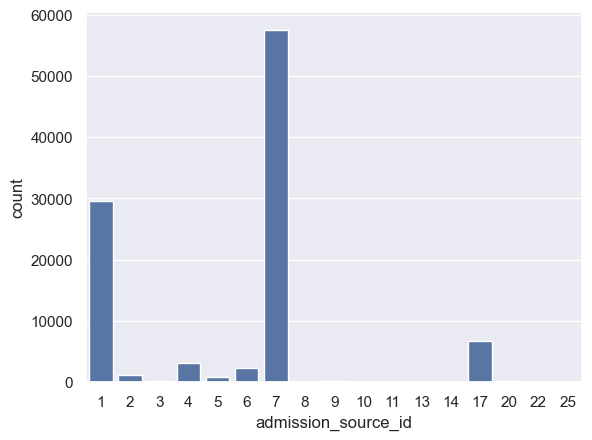

In [53]:
sns.countplot(x ="admission_source_id", data = diabet)
plt.show()

We can see that there is same problem here. Again we applied some map like:

- we'll put the similar ones together like **Referral or Transfer**
- we will replace **Null, Not Mapped, Unknown** values as NAN


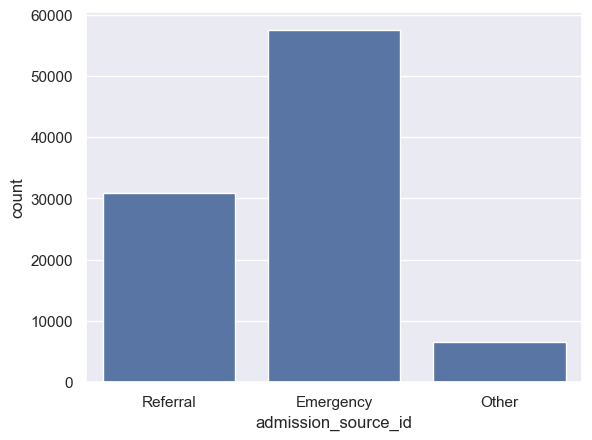

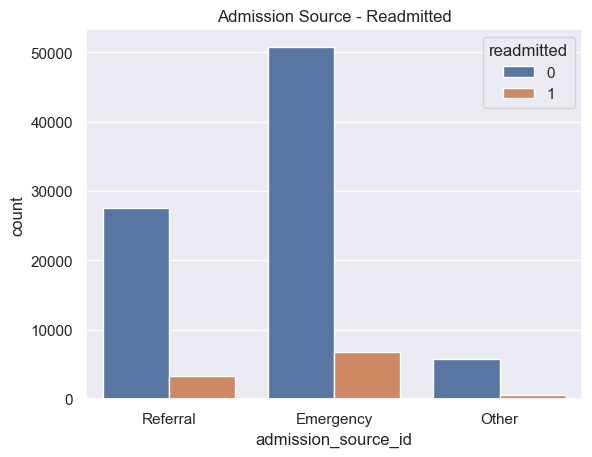

admission_source_id
Emergency    57492
Referral     30855
Other         6474
Name: count, dtype: int64


In [55]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
diabet.admission_source_id = diabet.admission_source_id.replace(mapped_adm)

sns.countplot(x = "admission_source_id", data = diabet)
plt.show()

sns.countplot(x = "admission_source_id", hue = "readmitted", data = diabet)
plt.title("Admission Source - Readmitted")
plt.show()


print(diabet.admission_source_id.value_counts())

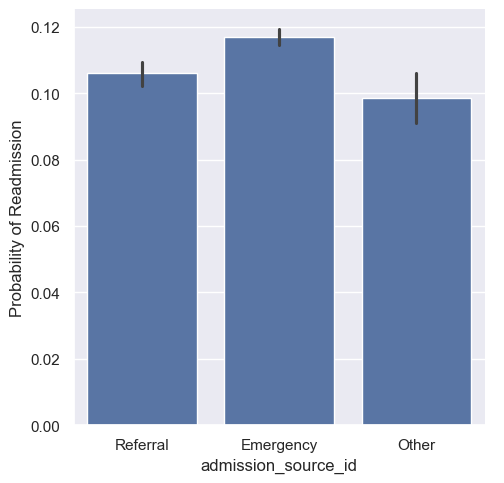

In [56]:
g = sns.catplot(x = "admission_source_id", y ="readmitted", 
                    data = diabet, kind = "bar", height= 5)
g.set_ylabels("Probability of Readmission")
plt.show()

- We see that **Readmitted Probability of Referral** is very close to **Emergency**, although **Emergency** is have more samples than other


## **Time in Hospital**
Integer number of days between admission and discharge. Shortly it is "treatment time"[](http://)

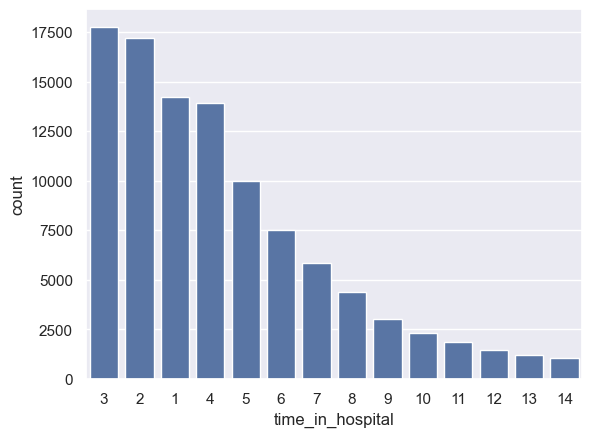

time_in_hospital
3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64


In [59]:
sns.countplot(x="time_in_hospital", data = diabet,
              order = diabet.time_in_hospital.value_counts().index)
plt.show()

print(diabet.time_in_hospital.value_counts())


C:\Users\Harsha S\AppData\Local\Temp\ipykernel_43832\2458101527.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 0), "time_in_hospital"],
C:\Users\Harsha S\AppData\Local\Temp\ipykernel_43832\2458101527.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 1), "time_in_hospital"],


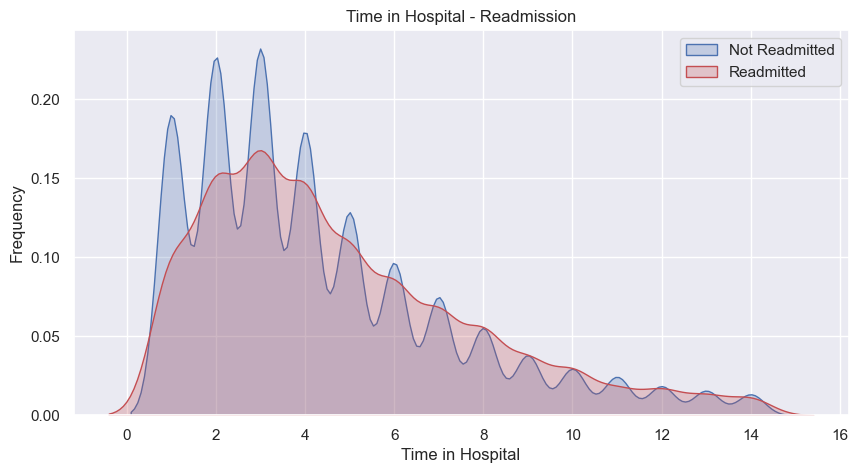

In [60]:
fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 0), "time_in_hospital"],
                 color = "b", shade = True, label = "Not Readmitted")

ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 1), "time_in_hospital"],
                 color = "r", shade = True, label = "Readmitted")
ax.legend(loc="upper right")

ax.set_xlabel("Time in Hospital")
ax.set_ylabel("Frequency")
ax.set_title("Time in Hospital - Readmission")
plt.show()

- Most of people stayed 2 - 3 days in hospital


### **Payer Code**

Integer identifier corresponding to 23 distinct values, for example, **Blue Cross\Blue
Shield, Medicare, and self-pay**

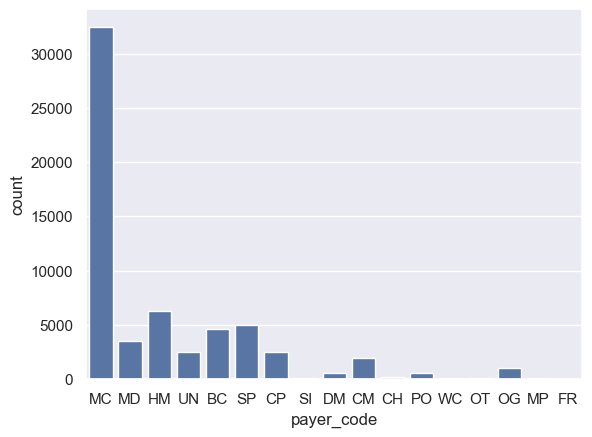

payer_code
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2531
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64


In [63]:
sns.countplot(x = "payer_code", data = diabet)
plt.show()

print(diabet.payer_code.value_counts())

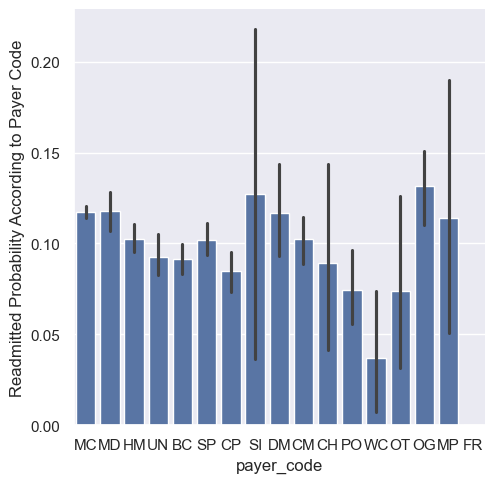

In [64]:
sns.catplot(x = "payer_code", y = "readmitted",
               data = diabet, kind = "bar", height = 5)
plt.ylabel("Readmitted Probability According to Payer Code")
plt.show()

### **Medical Specialty**
Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct
values, for example, **cardiology, internal medicine, family\general practice, and
surgeon**

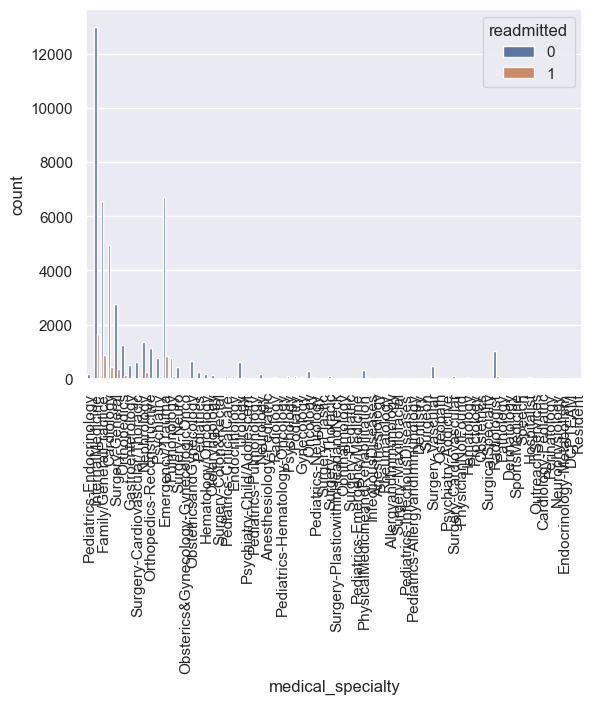

In [66]:
sns.countplot(x = "medical_specialty", hue = "readmitted",data = diabet)
plt.xticks(rotation = 90)
plt.show()

- Again, we have a lot of values. We will do grouping to get rid of this bad image, as before.

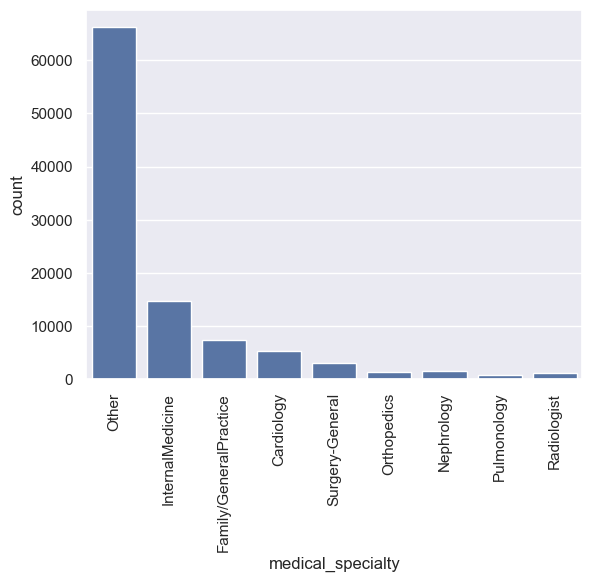

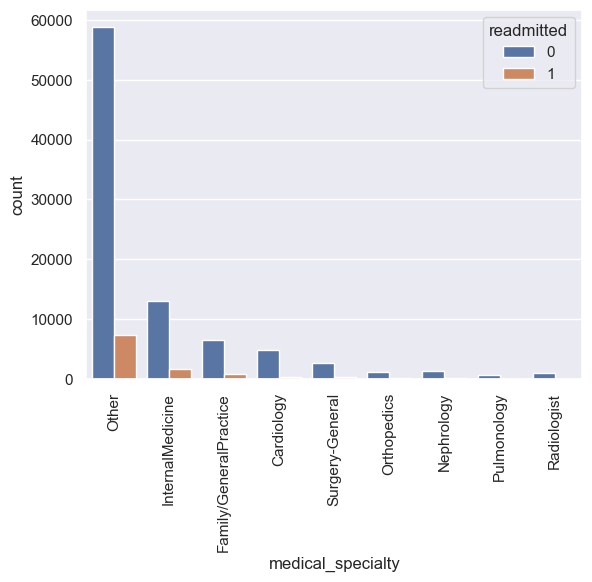

In [68]:
top_10=['InternalMedicine','Family/GeneralPractice','Cardiology','Surgery-General',
        "Nephrology","Orthopedics","Radiologist","Pulmonology"]

diabet.loc[~diabet['medical_specialty'].isin(top_10),'medical_specialty']='Other'



sns.countplot(x = "medical_specialty", data = diabet)
plt.xticks(rotation = 90)
plt.show()

sns.countplot(x = "medical_specialty",hue = "readmitted", data = diabet)
plt.xticks(rotation = 90)
plt.show()

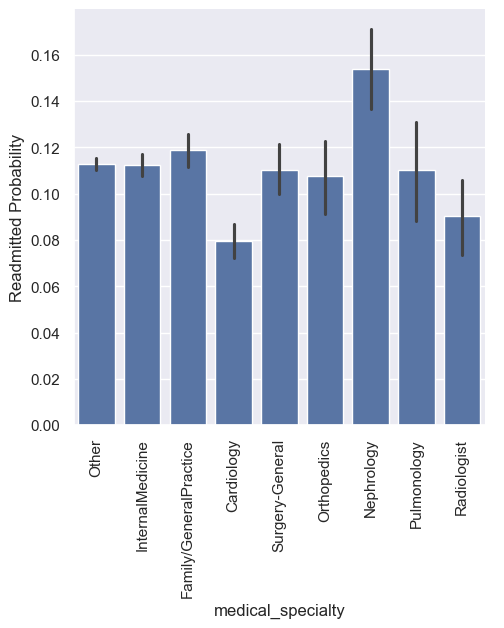

In [69]:
sns.catplot(x = "medical_specialty", y = "readmitted",
               data = diabet, kind = "bar", height = 5)
plt.ylabel("Readmitted Probability")
plt.xticks(rotation = 90)
plt.show()

- We clearlt see that the **Nephrology** section has more probability than others

### **Number of Lab Procedures**
Number of lab tests performed during the encounter

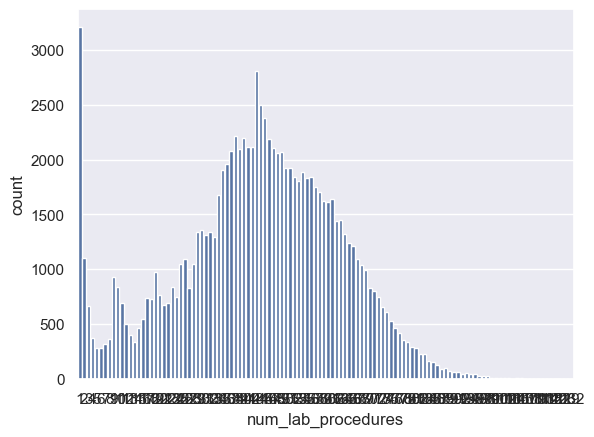

Proportions of Column
num_lab_procedures
1     3208
43    2804
44    2496
45    2376
38    2212
40    2201
46    2189
41    2117
42    2113
47    2106
Name: count, dtype: int64


In [72]:
sns.countplot(x = "num_lab_procedures", data = diabet)
plt.show()

print("Proportions of Column")
print(diabet.num_lab_procedures.value_counts().head(10))

C:\Users\Harsha S\AppData\Local\Temp\ipykernel_43832\1338322189.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 0), "num_lab_procedures"],
C:\Users\Harsha S\AppData\Local\Temp\ipykernel_43832\1338322189.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 1), "num_lab_procedures"],


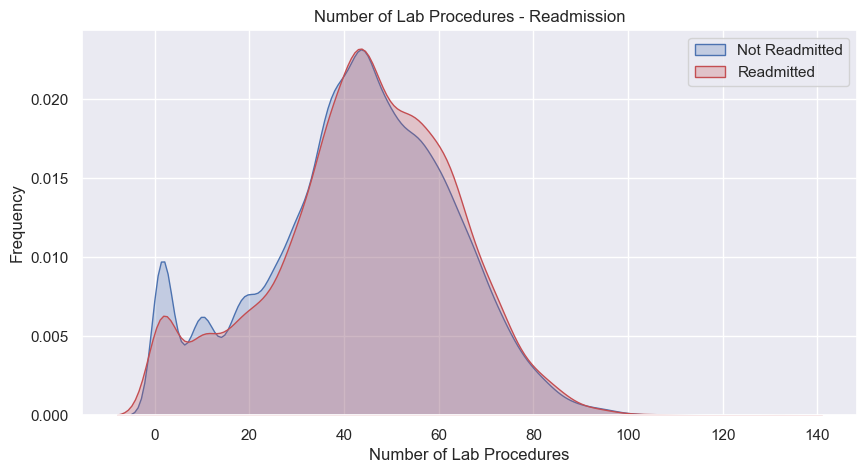

In [73]:
fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 0), "num_lab_procedures"],
                 color = "b", shade = True,label = "Not Readmitted")

#readmitted = 1
ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 1), "num_lab_procedures"],
                 color = "r", shade = True, label = "Readmitted")

ax.legend(loc="upper right")

ax.set_xlabel("Number of Lab Procedures")
ax.set_ylabel("Frequency")
ax.set_title("Number of Lab Procedures - Readmission")

plt.show()

### **Number of Procedures**
Number of procedures (other than lab tests) performed during the encounter

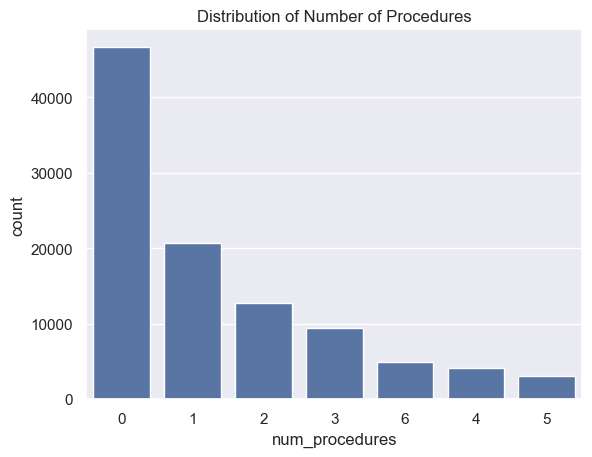

Proportions of Values
num_procedures
0    45.843774
1    20.381671
2    12.495701
3     9.279404
6     4.868174
4     4.107583
5     3.023692
Name: proportion, dtype: float64


In [75]:
sns.countplot(x = diabet.num_procedures, order = diabet.num_procedures.value_counts().index)
plt.title("Distribution of Number of Procedures")
plt.show()

print("Proportions of Values")
print(diabet.num_procedures.value_counts(normalize=True)*100)


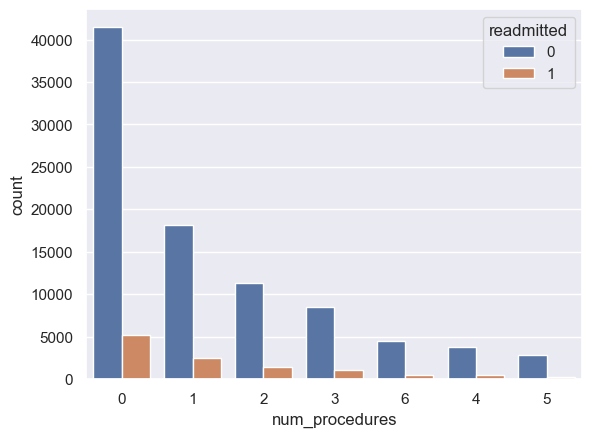

In [76]:
sns.countplot(x = "num_procedures", hue = "readmitted", 
              data = diabet, order = diabet.num_procedures.value_counts().index)
plt.show()

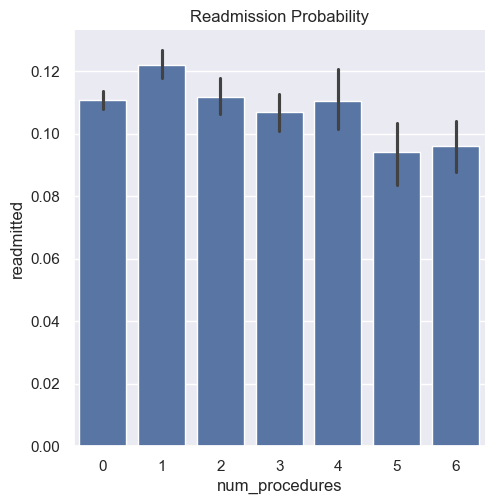

In [77]:
sns.catplot(x = "num_procedures", y = "readmitted",
               data = diabet, kind = "bar", height = 5)
plt.title("Readmission Probability")
plt.show()

## **Number of Medications**
Number of distinct generic names administered during the encounter

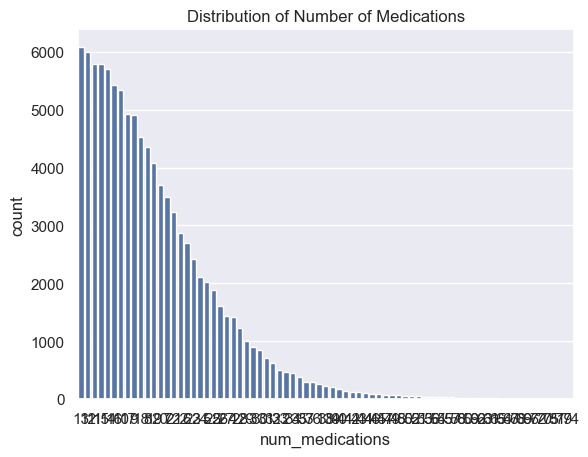

num_medications
13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
81       1
79       1
74       1
Name: count, Length: 75, dtype: int64


In [79]:
sns.countplot(x="num_medications", data = diabet, 
        order = diabet.num_medications.value_counts().index)
plt.title("Distribution of Number of Medications")
plt.show()

print(diabet.num_medications.value_counts())

### **Diag1, Diag2 and Diag3**
- In diag section there are lots of ID that belong the specific name. So we'll map them

In [81]:
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

In [82]:
diabet = map_diagnosis(diabet,["diag_1","diag_2","diag_3"])

C:\Users\Harsha S\AppData\Local\Temp\ipykernel_43832\2053257122.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Circulatory' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
C:\Users\Harsha S\AppData\Local\Temp\ipykernel_43832\2053257122.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Circulatory' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
C:\Users\Harsha S\AppData\Local\Temp\ipykernel_43832\2053257122.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Circula

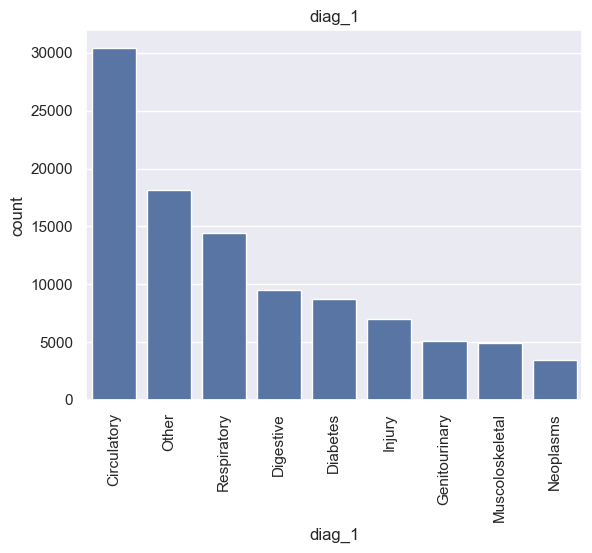

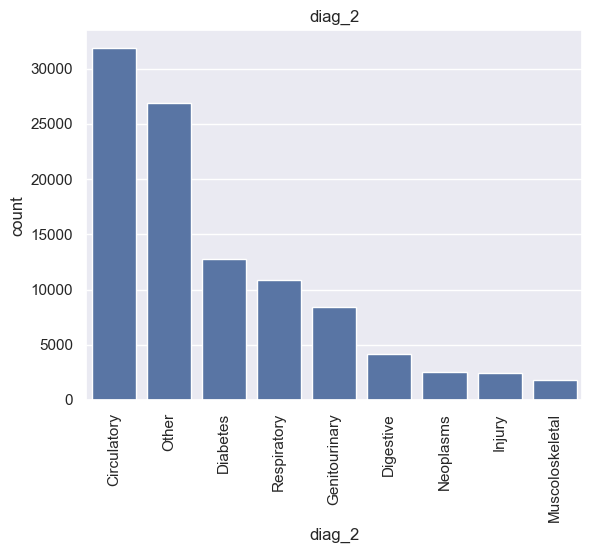

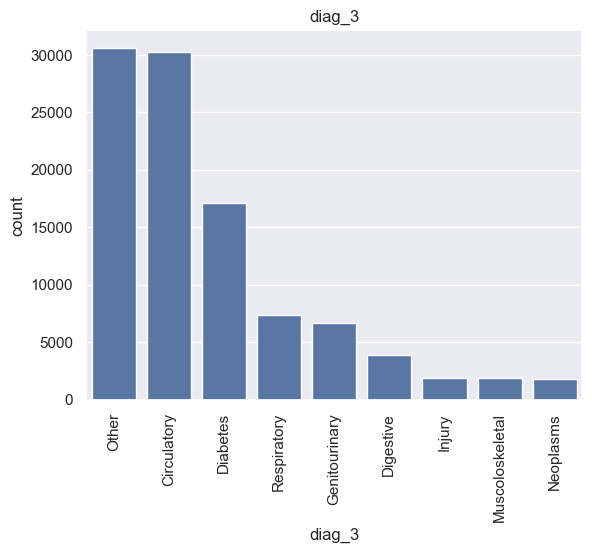

In [83]:
def plot_diags(col,data):
    sns.countplot(x = col, data = data,
            order = data[f"{col}"].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.show()

diag_cols = ["diag_1","diag_2","diag_3"]

for diag in diag_cols:
    plot_diags(diag,diabet)


## **Diabetes medications**

- There was too many medications that belong the diabet. And some of them has just one or two value that does not any impact the model. So we decided to drop them.
- But firstly, lets look at the medications

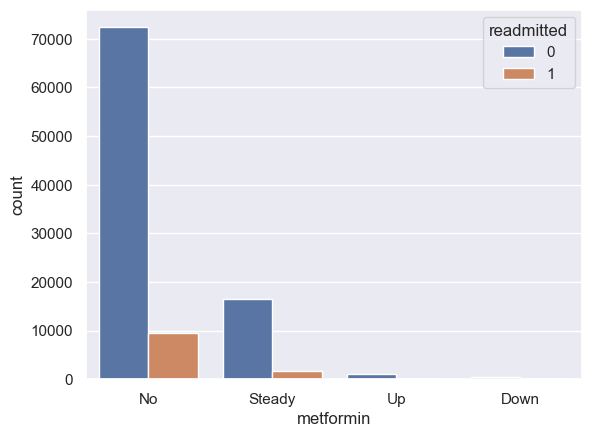

METFORMIN
metformin
No        81776
Steady    18345
Up         1067
Down        575
Name: count, dtype: int64


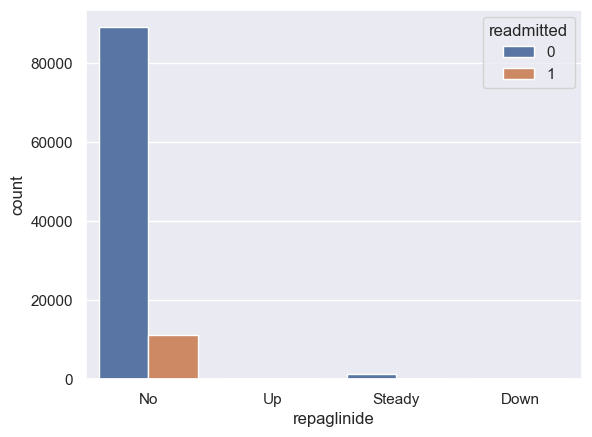

REPAGLINIDE
repaglinide
No        100224
Steady      1384
Up           110
Down          45
Name: count, dtype: int64


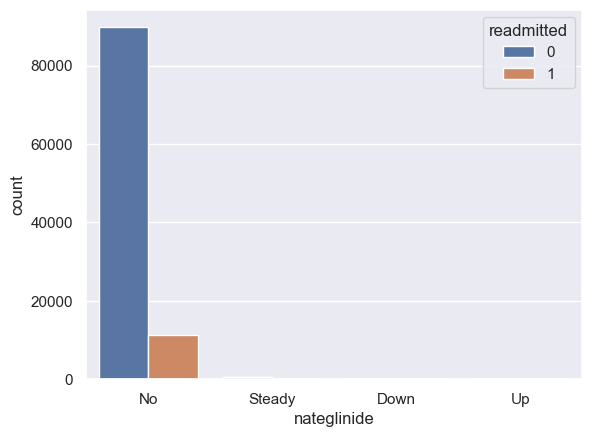

NATEGLINIDE
nateglinide
No        101060
Steady       668
Up            24
Down          11
Name: count, dtype: int64


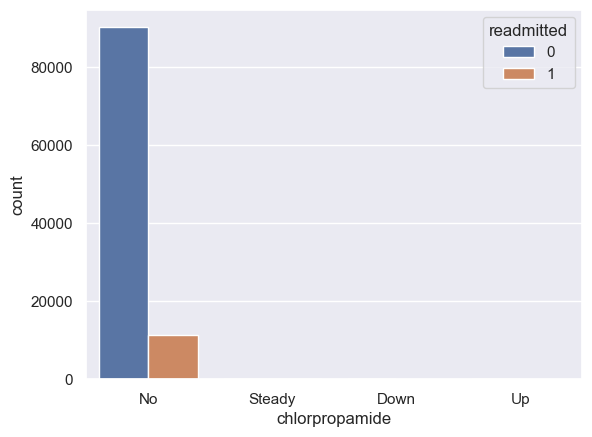

CHLORPROPAMIDE
chlorpropamide
No        101677
Steady        79
Up             6
Down           1
Name: count, dtype: int64


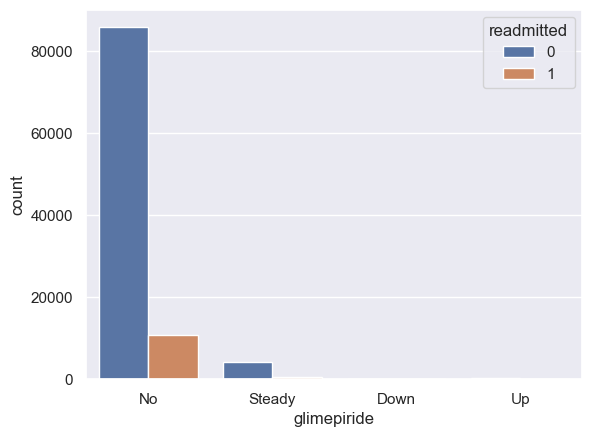

GLIMEPIRIDE
glimepiride
No        96572
Steady     4670
Up          327
Down        194
Name: count, dtype: int64


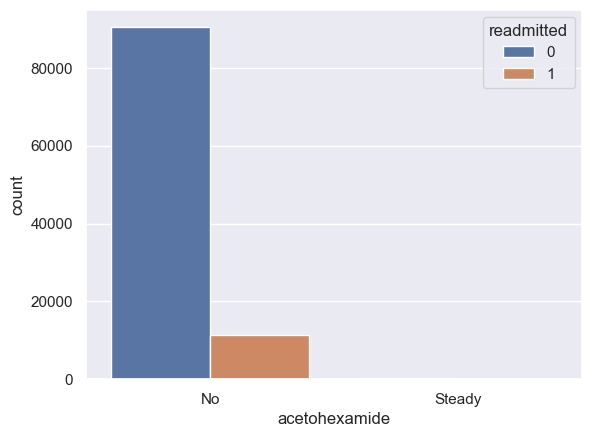

ACETOHEXAMIDE
acetohexamide
No        101762
Steady         1
Name: count, dtype: int64


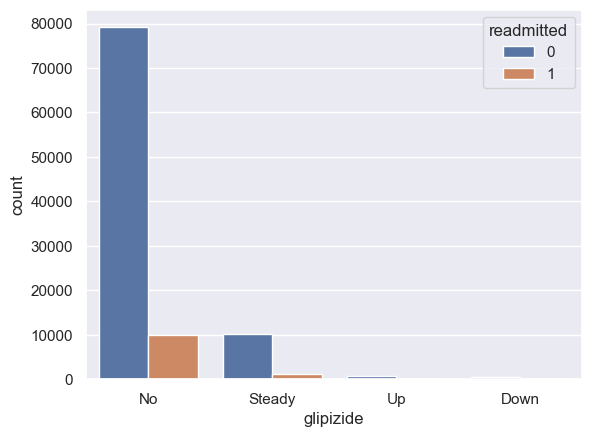

GLIPIZIDE
glipizide
No        89078
Steady    11355
Up          770
Down        560
Name: count, dtype: int64


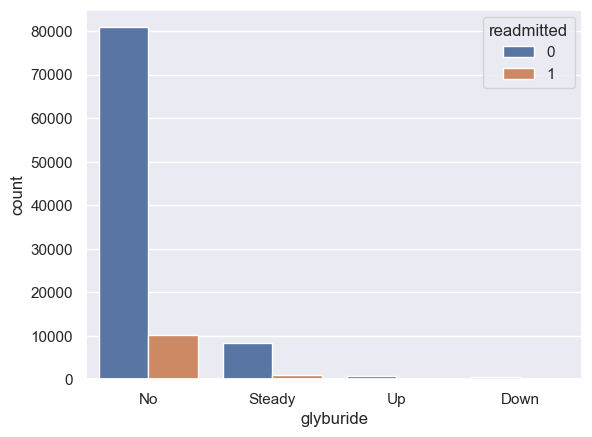

GLYBURIDE
glyburide
No        91113
Steady     9274
Up          812
Down        564
Name: count, dtype: int64


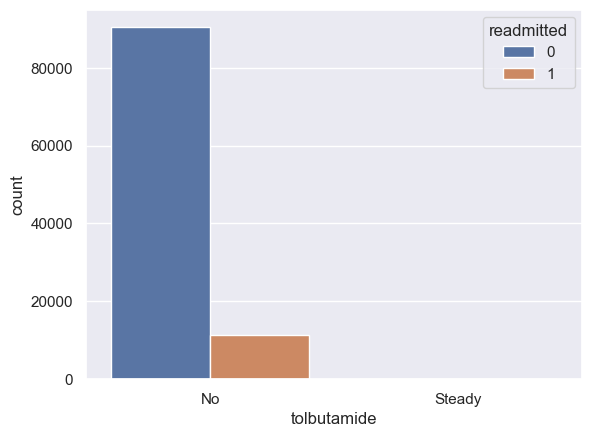

TOLBUTAMIDE
tolbutamide
No        101740
Steady        23
Name: count, dtype: int64


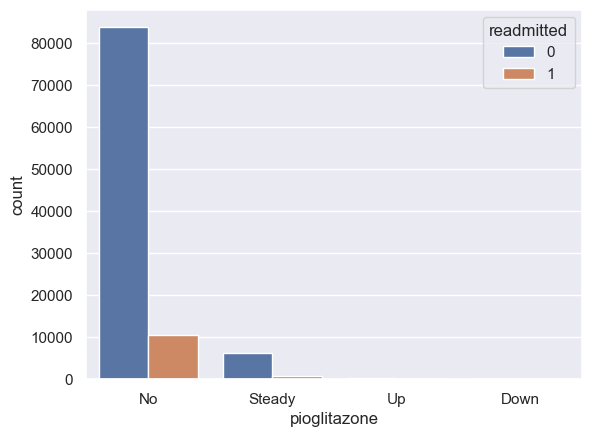

PIOGLITAZONE
pioglitazone
No        94436
Steady     6975
Up          234
Down        118
Name: count, dtype: int64


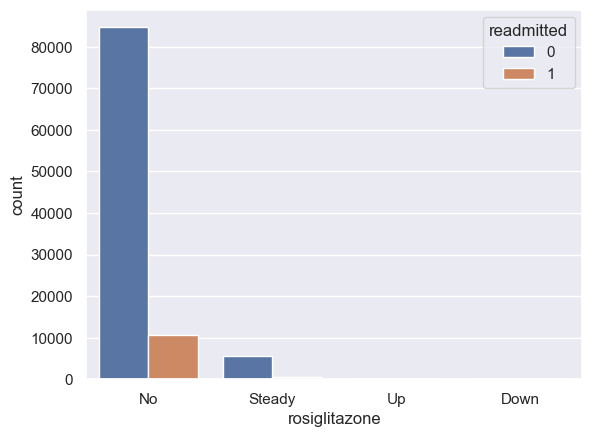

ROSIGLITAZONE
rosiglitazone
No        95399
Steady     6099
Up          178
Down         87
Name: count, dtype: int64


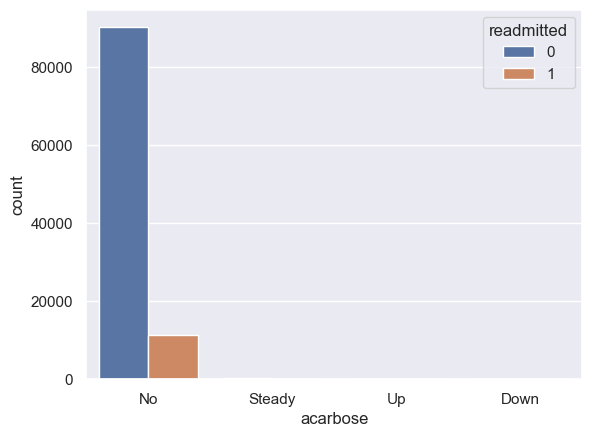

ACARBOSE
acarbose
No        101455
Steady       295
Up            10
Down           3
Name: count, dtype: int64


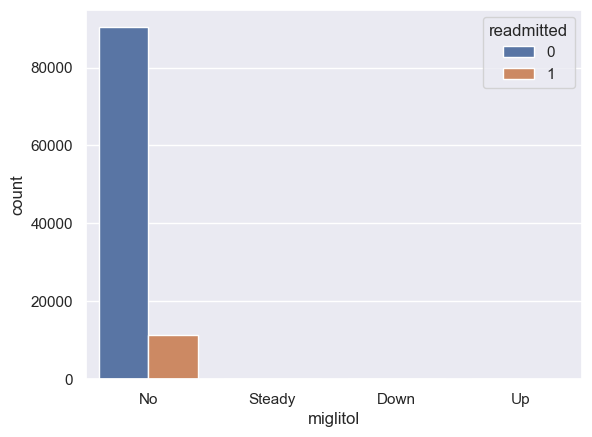

MIGLITOL
miglitol
No        101725
Steady        31
Down           5
Up             2
Name: count, dtype: int64


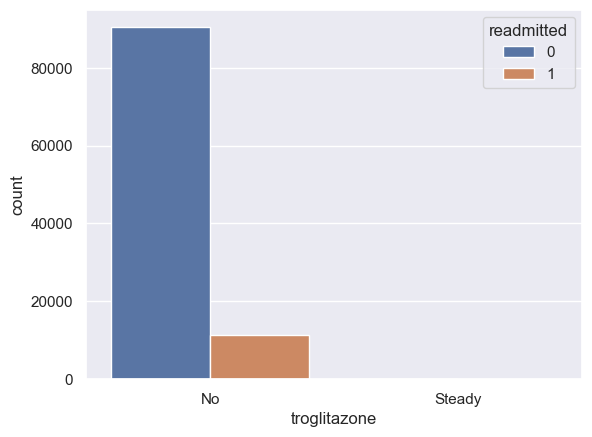

TROGLITAZONE
troglitazone
No        101760
Steady         3
Name: count, dtype: int64


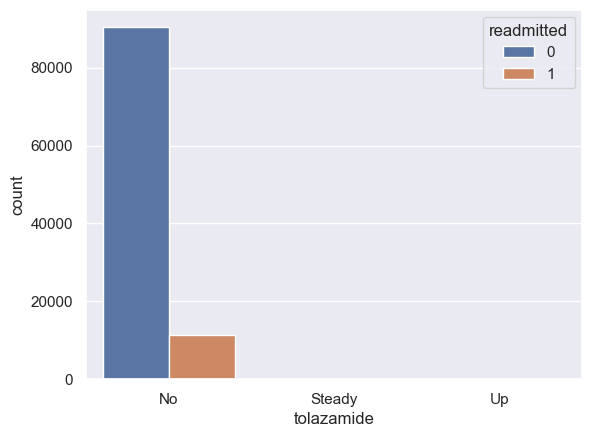

TOLAZAMIDE
tolazamide
No        101724
Steady        38
Up             1
Name: count, dtype: int64


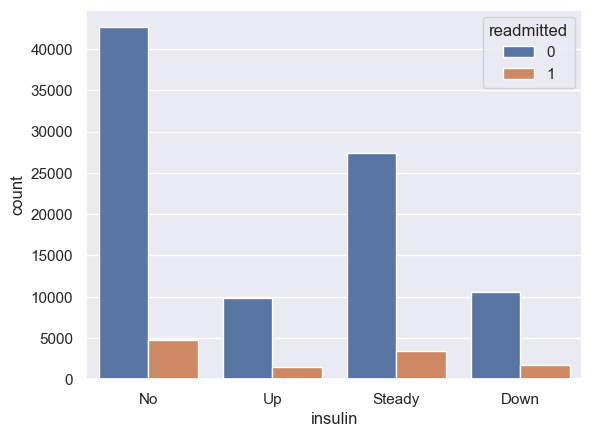

INSULIN
insulin
No        47380
Steady    30849
Down      12218
Up        11316
Name: count, dtype: int64


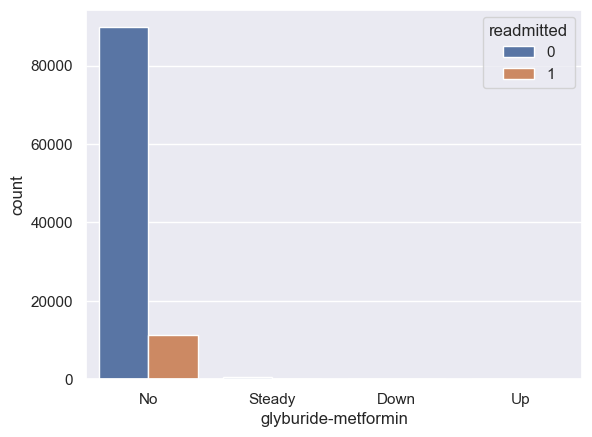

GLYBURIDE-METFORMIN
glyburide-metformin
No        101057
Steady       692
Up             8
Down           6
Name: count, dtype: int64


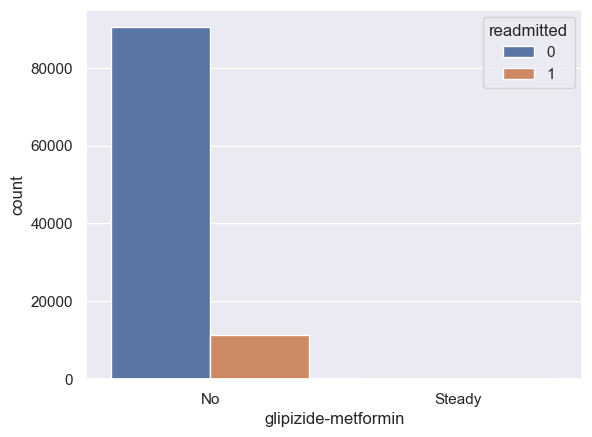

GLIPIZIDE-METFORMIN
glipizide-metformin
No        101750
Steady        13
Name: count, dtype: int64


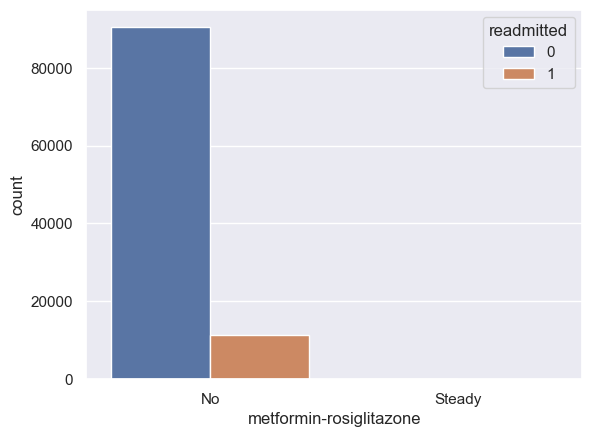

METFORMIN-ROSIGLITAZONE
metformin-rosiglitazone
No        101761
Steady         2
Name: count, dtype: int64


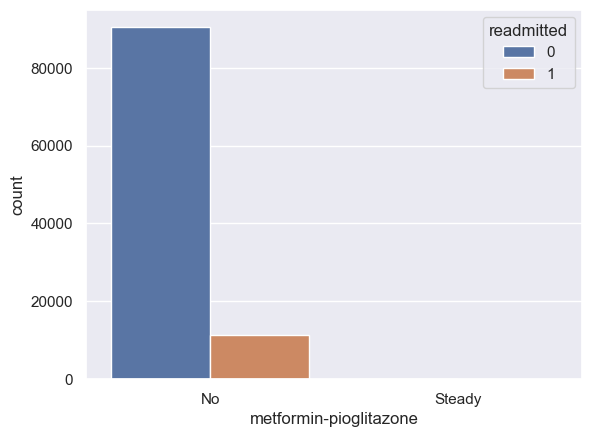

METFORMIN-PIOGLITAZONE
metformin-pioglitazone
No        101762
Steady         1
Name: count, dtype: int64


In [85]:
drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

def explore_drug(drugs):

  for drug in drugs:
    sns.countplot(x = drug, 
                  hue = "readmitted",
                  data = diabet)
    plt.show()
    print(drug.upper())
    print(diabet[f"{drug}"].value_counts())
    

explore_drug(drug_cols)

## **Change**
Indicates if there was a change in diabetic medications (either dosage or generic
name). Values: 
- **“change”** 
- **“no change”**

In [87]:
diabet.change.value_counts()

change
No    54754
Ch    47009
Name: count, dtype: int64

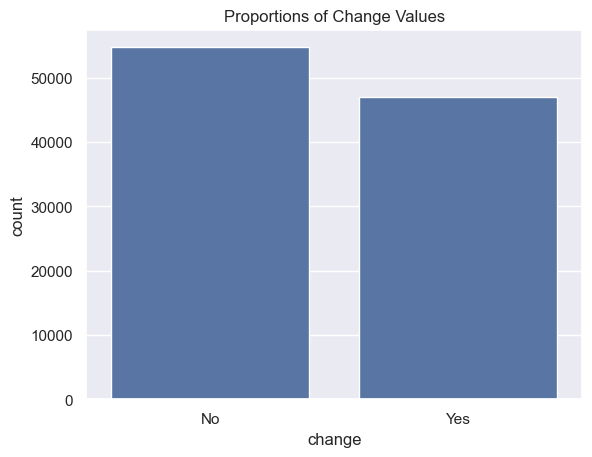

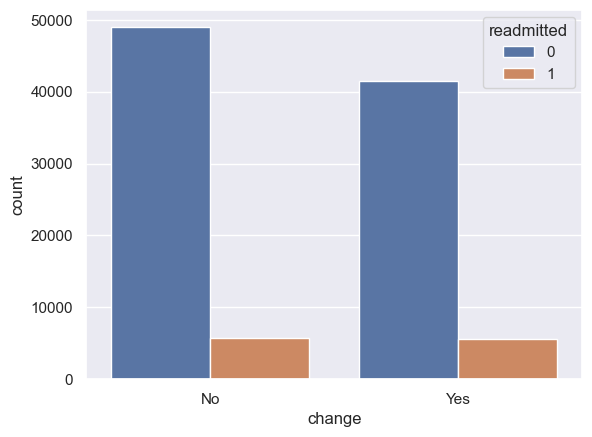

In [88]:
diabet.change = diabet.change.replace("Ch","Yes")

sns.countplot(x = "change", data = diabet)
plt.title("Proportions of Change Values")
plt.show()

sns.countplot(x = "change", hue = "readmitted", data = diabet)
plt.show()


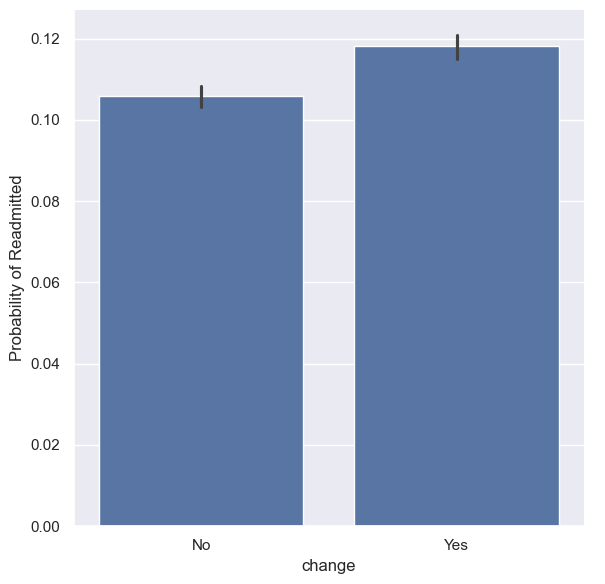

In [89]:
g = sns.catplot(x = "change", y="readmitted", data = diabet, height = 6, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

## **Glucose Serum Test Result**<br>
Indicates the range of the result or if the test was not taken.<br> 
Values: 
- “>200,” 
- “>300,”
- “normal,” 
- “none” if not measured<br>

We decided use the Glucose Serum Test Result like as follows:


C:\Users\Harsha S\AppData\Local\Temp\ipykernel_43832\1863329877.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabet["max_glu_serum"] = diabet["max_glu_serum"].replace({">200":2,


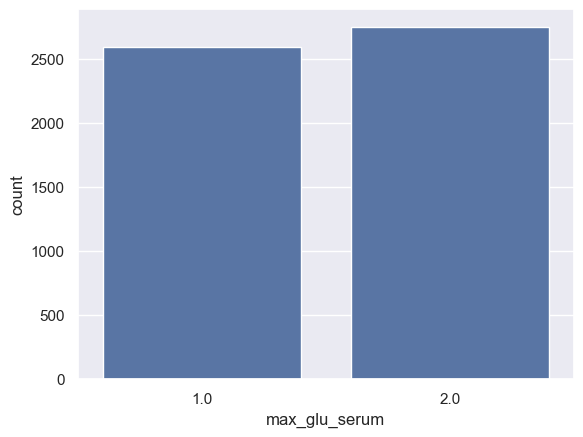

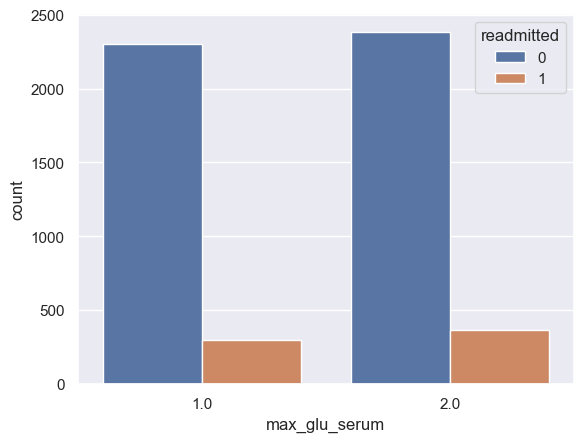

max_glu_serum
2.0    2749
1.0    2597
Name: count, dtype: int64


In [91]:
diabet["max_glu_serum"] = diabet["max_glu_serum"].replace({">200":2,
                                                        ">300":2,
                                                        "Norm":1,
                                                        "None":0}) 

sns.countplot(x = "max_glu_serum", data = diabet)
plt.show()

sns.countplot(x = "max_glu_serum",hue = "readmitted", data = diabet)
plt.show()

print(diabet.max_glu_serum.value_counts())

## **A1c test result**

Indicates the range of the result or if the test was not taken. <br>
Values: 
- “>8” if the result
was greater than 8%, 
- “>7” if the result was greater than 7% but less than 8%, “normal”
- if the result was less than 7%, and “none” if not measured.

We decided use the A1c test result like as follows:

C:\Users\Harsha S\AppData\Local\Temp\ipykernel_43832\2001963890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabet["A1Cresult"] = diabet["A1Cresult"].replace({">7":2,


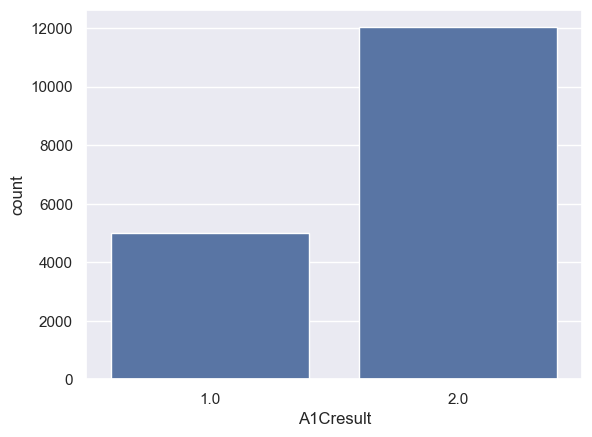

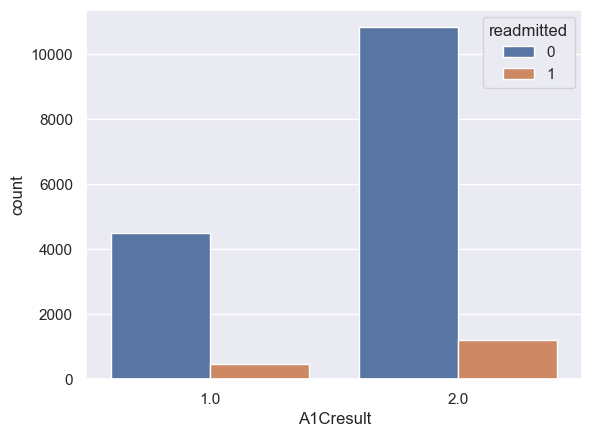

A1Cresult
2.0    12028
1.0     4990
Name: count, dtype: int64


In [93]:
diabet["A1Cresult"] = diabet["A1Cresult"].replace({">7":2,
                                           ">8":2,
                                           "Norm":1,
                                           "None":0})

sns.countplot(x = "A1Cresult", data = diabet)
plt.show()

sns.countplot(x = "A1Cresult",hue = "readmitted", data = diabet)
plt.show()

print(diabet.A1Cresult.value_counts())

## **Diabetes medications**
Indicates if there was any diabetic medication prescribed. Values: **“yes”** and **“no”**

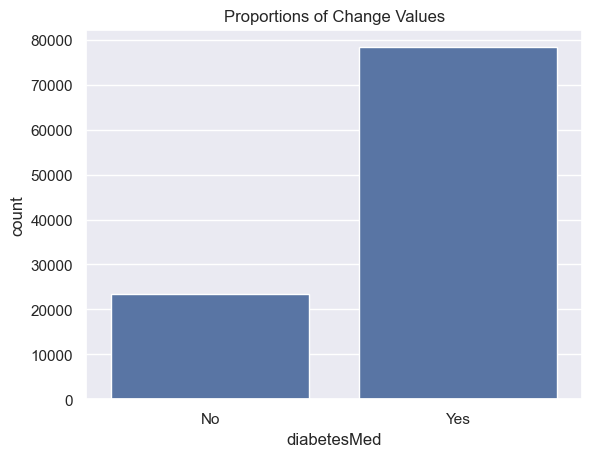

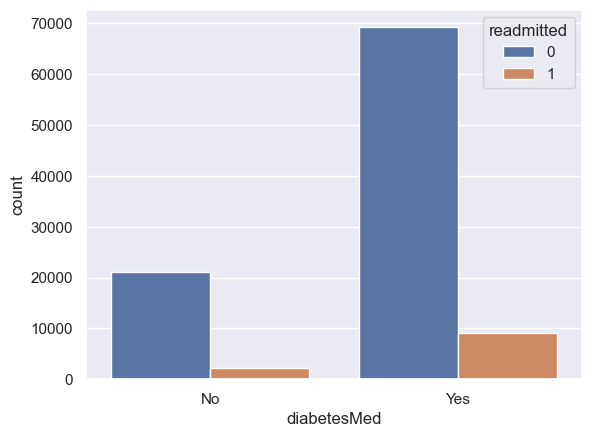

diabetesMed
Yes    78361
No     23402
Name: count, dtype: int64


In [95]:
sns.countplot(x = "diabetesMed", data = diabet )
plt.title("Proportions of Change Values")
plt.show()

sns.countplot(x = "diabetesMed", hue = "readmitted", data = diabet)
plt.show()

print(diabet.diabetesMed.value_counts())

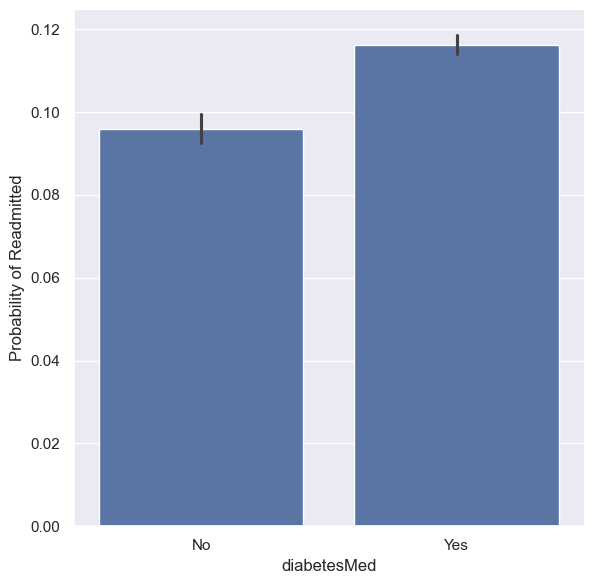

In [96]:
g = sns.catplot(x = "diabetesMed", y="readmitted", 
            data = diabet, height = 6, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()